In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

from alp import beams
from alp import models
from alp import exp
from alp.exp_dicts import EXPERIMENTS

# Saving Pythia8 events to pickled files for easier use

In [3]:
alp = models.ALP(0.5, 1e8, c_lepton=np.diag([1, 1, 1]))

NUMI_files = 'pythia8_events/soft_120_GeV'
SPS_files  = 'pythia8_events/soft_400_GeV'
LHC_files  = 'pythia8_events/soft_13.6_TeV'

# Test that the Experiment class can load also the list of files
NUMI      = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['NoVA'], alp=alp, savemem=False)
SPS        = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['SHiP'], alp=alp, savemem=False)
LHC  = exp.Experiment(LHC_files, exp_dic=EXPERIMENTS['FASER'], alp=alp, savemem=False)

Found 303 files matching pythia8_events/soft_120_GeV_*.txt
Found 303 files matching pythia8_events/soft_400_GeV_*.txt
Found 202 files matching pythia8_events/soft_13.6_TeV_*.txt


In [4]:
df_numi = exp.load_events(NUMI_files)
exp.save_events_to_pickle(df_numi, 'pythia8_events/numi_120GeV.pkl')

df_sps = exp.load_events(SPS_files)
exp.save_events_to_pickle(df_sps, 'pythia8_events/sps_400GeV.pkl')

df_lhc = exp.load_events(LHC_files)
exp.save_events_to_pickle(df_lhc, 'pythia8_events/lhc_13.6TeV.pkl')

Found 303 files matching pythia8_events/soft_120_GeV_*.txt
Found 303 files matching pythia8_events/soft_400_GeV_*.txt
Found 202 files matching pythia8_events/soft_13.6_TeV_*.txt


In [5]:
print("Total number of Pythia8 events:", NUMI.nevents, SPS.nevents, LHC.nevents)

Total number of Pythia8 events: 1163807 3093151 1111067


# Save instances of the Experiment class to pickle files for faster loading

In [6]:
### Pythia8 tau events
NUMI_files = 'pythia8_events/numi_120GeV.pkl'
SPS_files  = 'pythia8_events/sps_400GeV.pkl'
LHC_files  = 'pythia8_events/lhc_13.6TeV.pkl'


In [7]:
%%prun

alp = models.ALP(0.5, 1e8, c_lepton=np.diag([1, 1, 1]))

# Creating the experimental classes
ICARUS = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS["ICARUS"], duplicate_taus=10, alp=alp)
MICROBOONE = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS["MicroBooNE"], duplicate_taus=20, alp=alp)
NOVA = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS["NoVA"], duplicate_taus=3, alp=alp)
DUNE = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS["DUNE"], duplicate_taus=5, alp=alp)
TWOBYTWO = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS["TwoByTwo"], alp=alp)
TWOBYTWO_ABSORBER = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS["TwoByTwo_absorber"], alp=alp)
ARGONEUT = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS["ArgoNeuT"], duplicate_taus=5, alp=alp)
ARGONEUT_absorber = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS["ArgoNeuT_absorber"], duplicate_taus=5, alp=alp)
CHARM = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS["CHARM"], alp=alp)
BEBC = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS["BEBC"], alp=alp)
SHIP = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS["SHiP"], alp=alp)
PROTODUNE_NP02 = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS["PROTO_DUNE_NP02"], duplicate_taus=2, alp=alp)
PROTODUNE_NP04 = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS["PROTO_DUNE_NP04"], duplicate_taus=2, alp=alp)
FASER = exp.Experiment(LHC_files, exp_dic=EXPERIMENTS["FASER"], alp=alp)
FASER2 = exp.Experiment(LHC_files, exp_dic=EXPERIMENTS["FASER2"], alp=alp)

         150771 function calls in 58.649 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      180    8.144    0.045    8.144    0.045 transform4D.py:41(cartesian_t)
       15    6.931    0.462   53.119    3.541 exp.py:381(get_alp_events)
      180    5.841    0.032   13.986    0.078 boost_p4.py:45(cartesian_t)
      240    4.853    0.020    4.859    0.020 numpy.py:116(_array_from_columns)
       60    4.257    0.071   34.862    0.581 exp.py:324(generate_alp_events)
      937    3.764    0.004    3.780    0.004 numpy.py:1723(_wrap_result)
       60    3.368    0.056   18.084    0.301 exp.py:286(sample_alp_daughter_4momenta)
      217    2.809    0.013    2.809    0.013 mag2.py:32(xy_z)
       15    1.939    0.129   55.214    3.681 exp.py:512(get_alps_in_acceptance)
      180    1.685    0.009   17.099    0.095 boost_p4.py:110(cartesian_t_xy_z_t)
       37    1.555    0.042    5.809    0.157 unit.py:33(xy_z)
     3881    1.3

In [8]:
exp.save_events_to_pickle(ICARUS, 'tau_events/ICARUS.pkl')
exp.save_events_to_pickle(MICROBOONE, 'tau_events/MICROBOONE.pkl')
exp.save_events_to_pickle(NOVA, 'tau_events/NOVA.pkl')
exp.save_events_to_pickle(DUNE, 'tau_events/DUNE.pkl')
exp.save_events_to_pickle(TWOBYTWO, 'tau_events/TWOBYTWO.pkl')
exp.save_events_to_pickle(TWOBYTWO_ABSORBER, 'tau_events/TWOBYTWO_ABSORBER.pkl')
exp.save_events_to_pickle(ARGONEUT, 'tau_events/ARGONEUT.pkl')
exp.save_events_to_pickle(ARGONEUT_absorber, 'tau_events/ARGONEUT_absorber.pkl')
exp.save_events_to_pickle(CHARM, 'tau_events/CHARM.pkl')
exp.save_events_to_pickle(BEBC, 'tau_events/BEBC.pkl')
exp.save_events_to_pickle(SHIP, 'tau_events/SHIP.pkl')
exp.save_events_to_pickle(PROTODUNE_NP02, 'tau_events/PROTODUNE_NP02.pkl')
exp.save_events_to_pickle(PROTODUNE_NP04, 'tau_events/PROTODUNE_NP04.pkl')
exp.save_events_to_pickle(FASER, 'tau_events/FASER.pkl')
exp.save_events_to_pickle(FASER2, 'tau_events/FASER2.pkl')

In [9]:
ICARUS_test = exp.load_events_from_pickle('tau_events/ICARUS.pkl')
MICROBOONE_test = exp.load_events_from_pickle('tau_events/MICROBOONE.pkl')
NOVA_test = exp.load_events_from_pickle('tau_events/NOVA.pkl')
DUNE_test = exp.load_events_from_pickle('tau_events/DUNE.pkl')
TWOBYTWO_test = exp.load_events_from_pickle('tau_events/TWOBYTWO.pkl')
TWOBYTWO_ABSORBER_test = exp.load_events_from_pickle('tau_events/TWOBYTWO_ABSORBER.pkl')
ARGONEUT_test = exp.load_events_from_pickle('tau_events/ARGONEUT.pkl')
ARGONEUT_absorber_test = exp.load_events_from_pickle('tau_events/ARGONEUT_absorber.pkl')
CHARM_test = exp.load_events_from_pickle('tau_events/CHARM.pkl')
BEBC_test = exp.load_events_from_pickle('tau_events/BEBC.pkl')
SHIP_test = exp.load_events_from_pickle('tau_events/SHIP.pkl')
PROTODUNE_NP02_test = exp.load_events_from_pickle('tau_events/PROTODUNE_NP02.pkl')
PROTODUNE_NP04_test = exp.load_events_from_pickle('tau_events/PROTODUNE_NP04.pkl')
FASER_test = exp.load_events_from_pickle('tau_events/FASER.pkl')
FASER2_test = exp.load_events_from_pickle('tau_events/FASER2.pkl')

In [347]:
CHARM.event_rate

np.float64(3.4337090829918934e-14)

# Inspect the taus/POT

In [30]:
def get_ntaus_per_POT(event_dict, pid_mother=None):
    """
    Get the number of taus per POT
    """
    
    total_weight_unmasked = event_dict['weights'].sum()

    if pid_mother is not None:
        mask = event_dict['mother_pid'] == pid_mother
    else:
        mask = np.ones(len(event_dict['weights']), dtype=bool)
   
    # Ratio of weighted events to total generated events
    ratio = event_dict['tau_xsec_mb'] / event_dict['total_xsec_mb'] * event_dict['weights'][mask].sum() / total_weight_unmasked
    
    # Statistical uncertainty on the sum of weights
    relative_uncertainty = np.sqrt((event_dict['weights'][mask]**2).sum())/event_dict['weights'][mask].sum()

    # Propagate uncertainty to the ratio (assuming total_events is exact)
    uncertainty = relative_uncertainty * ratio

    xsec = event_dict['tau_xsec_mb'] * event_dict['weights'][mask].sum()/total_weight_unmasked
    
    return ratio, uncertainty, xsec

def summarize_taus(name):
    print(f"\nTau summary for {name}")
    files = name
    event_dict = exp.load_events(files)

    ratio, unc, xsec = get_ntaus_per_POT(event_dict,)
    print(f"Taus/event: {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(event_dict, pid_mother=411)
    print(f"Taus/event (D+): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(event_dict, pid_mother=-411)
    print(f"Taus/event (D-): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(event_dict, pid_mother=431)
    print(f"Taus/event (Ds+): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(event_dict, pid_mother=-431)
    print(f"Taus/event (Ds-): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(event_dict, pid_mother=100443)
    print(f"Taus/event (psi(2S)): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")


In [31]:
### Pythia8 tau events
# NUMI_files = 'pythia8_events/numi_120GeV.pkl'
# SPS_files  = 'pythia8_events/sps_400GeV.pkl'
# LHC_files  = 'pythia8_events/lhc_13.6TeV.pkl'
NUMI_files = 'pythia8_events/soft_120_GeV'
SPS_files  = 'pythia8_events/soft_400_GeV'
LHC_files  = 'pythia8_events/soft_13.6_TeV'

summarize_taus(LHC_files)
summarize_taus(SPS_files)
summarize_taus(NUMI_files)


Tau summary for pythia8_events/soft_13.6_TeV
Found 202 files matching pythia8_events/soft_13.6_TeV_*.txt
Taus/event: 2.13e-03 +/- 7.83e-06 --> (xsec/mb = 2.18e-01 +/- 8.00e-04)
Taus/event (D+): 4.69e-05 +/- 7.37e-08 --> (xsec/mb = 4.80e-03 +/- 7.53e-06)
Taus/event (D-): 4.70e-05 +/- 7.37e-08 --> (xsec/mb = 4.81e-03 +/- 7.54e-06)
Taus/event (Ds+): 7.40e-04 +/- 1.95e-06 --> (xsec/mb = 7.56e-02 +/- 2.00e-04)
Taus/event (Ds-): 7.42e-04 +/- 1.96e-06 --> (xsec/mb = 7.59e-02 +/- 2.00e-04)
Taus/event (psi(2S)): 1.90e-06 +/- 2.38e-08 --> (xsec/mb = 1.94e-04 +/- 2.43e-06)

Tau summary for pythia8_events/soft_400_GeV
Found 303 files matching pythia8_events/soft_400_GeV_*.txt
Taus/event: 1.78e-06 +/- 2.12e-09 --> (xsec/mb = 6.87e-05 +/- 8.18e-08)
Taus/event (D+): 5.76e-08 +/- 5.60e-11 --> (xsec/mb = 2.22e-06 +/- 2.16e-09)
Taus/event (D-): 6.91e-08 +/- 6.13e-11 --> (xsec/mb = 2.66e-06 +/- 2.36e-09)
Taus/event (Ds+): 7.48e-07 +/- 1.35e-09 --> (xsec/mb = 2.88e-05 +/- 5.19e-08)
Taus/event (Ds-): 8.84

# Generating events with simplified parameterization of the D(s) pT spectrum

In [32]:
n_cc = 4.4
delta_n_cc = 1.6*2  

b = 1.41
delta_b = 0.4*2

n_events = '1e6'

dict_120 = beams.generate_taus(n_events=float(n_events), p_beam=120, n_exp=n_cc+delta_n_cc, a=0, b=b, as_dict=True)
exp.save_events_to_pickle(dict_120, f"tau_events/df_120GeV_{n_events}_ncentral_bcentral.pkl")

dict_120 = beams.generate_taus(n_events=float(n_events), p_beam=120, n_exp=n_cc-delta_n_cc, a=0, b=b-delta_b, as_dict=True)
exp.save_events_to_pickle(dict_120, f"tau_events/df_120GeV_{n_events}_nlow_blow.pkl")

dict_120 = beams.generate_taus(n_events=float(n_events), p_beam=120, n_exp=n_cc+delta_n_cc, a=0, b=b+delta_b, as_dict=True)
exp.save_events_to_pickle(dict_120, f"tau_events/df_120GeV_{n_events}_nhigh_bhigh.pkl")

dict_120 = beams.generate_taus(n_events=float(n_events), p_beam=120, n_exp=n_cc-delta_n_cc, a=0, b=b+delta_b, as_dict=True)
exp.save_events_to_pickle(dict_120, f"tau_events/df_120GeV_{n_events}_nlow_bhigh.pkl")

dict_120 = beams.generate_taus(n_events=float(n_events), p_beam=120, n_exp=n_cc+delta_n_cc, a=0, b=b-delta_b, as_dict=True)
exp.save_events_to_pickle(dict_120, f"tau_events/df_120GeV_{n_events}_nhigh_blow.pkl")


In [31]:
n_cc = 5.81
delta_n_cc = 0.28*2

b = 0.96
delta_b = 0.06*2

n_events = '1e6'

dict_400 = beams.generate_taus(n_events=float(n_events), p_beam=400, n_exp=n_cc, a=0, b=b, as_dict=True)
exp.save_events_to_pickle(dict_400, f"tau_events/df_400GeV_{n_events}_ncentral_bcentral.pkl")

dict_400 = beams.generate_taus(n_events=float(n_events), p_beam=400, n_exp=n_cc-delta_n_cc, a=0, b=b-delta_b, as_dict=True)
exp.save_events_to_pickle(dict_400, f"tau_events/df_400GeV_{n_events}_nlow_blow.pkl")

dict_400 = beams.generate_taus(n_events=float(n_events), p_beam=400, n_exp=n_cc+delta_n_cc, a=0, b=b+delta_b, as_dict=True)
exp.save_events_to_pickle(dict_400, f"tau_events/df_400GeV_{n_events}_nhigh_bhigh.pkl")

dict_400 = beams.generate_taus(n_events=float(n_events), p_beam=400, n_exp=n_cc-delta_n_cc, a=0, b=b+delta_b, as_dict=True)
exp.save_events_to_pickle(dict_400, f"tau_events/df_400GeV_{n_events}_nlow_bhigh.pkl")

dict_400 = beams.generate_taus(n_events=float(n_events), p_beam=400, n_exp=n_cc+delta_n_cc, a=0, b=b-delta_b, as_dict=True)
exp.save_events_to_pickle(dict_400, f"tau_events/df_400GeV_{n_events}_nhigh_blow.pkl")

In [28]:
df = exp.load_events_from_pickle("tau_events/df_120GeV_1e6_ncentral_bcentral.pkl")
df = exp.load_events_from_pickle("tau_events/df_400GeV_1e6_ncentral_bcentral.pkl")

In [29]:
df['pz']

array([  2.32752191,  60.98290781,   4.05813152, ..., 110.38275194,
         4.32031148,   2.28651585])

(array([ 89302., 371200., 177332.,  96721.,  61617.,  43546.,  32660.,
         25953.,  21636.,  18579.,  16079.,  14249.,  13043.,  11855.,
         11017.,  10346.,   9928.,   9359.,   8853.,   8606.,   8400.,
          8013.,   7815.,   7662.,   7557.,   7241.,   7269.,   6988.,
          6967.,   7017.,   6771.,   6613.,   6506.,   6524.,   6485.,
          6444.,   6394.,   6275.,   6386.,   6293.,   6266.,   6258.,
          6383.,   6166.,   6047.,   6027.,   6021.,   5986.,   6074.,
          5975.,   5942.,   6036.,   5969.,   6040.,   5940.,   5874.,
          5748.,   5882.,   5855.,   5857.,   5860.,   5840.,   5965.,
          5760.,   5877.,   5672.,   5857.,   5814.,   5787.,   5843.,
          5782.,   5754.,   5873.,   5824.,   5707.,   5708.,   5757.,
          5606.,   5667.,   5640.,   5703.,   5660.,   5636.,   5604.,
          5771.,   5750.,   5670.,   5531.,   5682.,   5729.,   5533.,
          5726.,   5658.,   5699.,   5577.,   5589.,   5601.,   5755.,
      

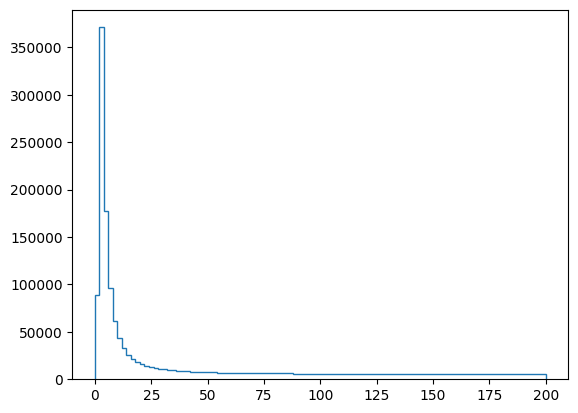

In [30]:
import matplotlib.pyplot as plt
plt.hist(df['pz'], bins=100, range=(0, 200), histtype='step', label='120 GeV')
